<a href="https://colab.research.google.com/github/okana2ki/ML/blob/main/eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2クラス分類モデルとその評価

**モデルの評価**のサンプルプログラムとして作成しました。

In [24]:
# prompt: ロジスティック回帰で２クラスを分類するプログラムを書いて。10データの訓練セットと、10データのテストセットを作って。テストセットで精度評価をして。混同行列を書いて、正解率、精度、再現率、F値で評価して。
# 4つの提案のうちの2つ目を採用

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 訓練データとテストデータを作成
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5], [3.5, 1], [4, 1.5], [3, 3], [2.5, 3.5]])
y_train = np.array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

X_test = np.array([[1, 0.5], [1.5, 1], [2, 1.5], [2.5, 2], [3, 2.5], [3.5, 3], [0.5, 3.5], [1, 4], [1.5, 4.5], [2, 5]])
y_test = np.array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

# モデルを学習
model = LogisticRegression()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 混同行列を求める
confusion_matrix = confusion_matrix(y_test, y_pred)

# 正解率、精度、再現率、F値を求める
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 結果を出力
print("混同行列:")
print(confusion_matrix)
print("\n正解率:", accuracy)
print("精度:", precision)
print("再現率:", recall)
print("F値:", f1)

混同行列:
[[2 3]
 [0 5]]

正解率: 0.7
精度: 0.625
再現率: 1.0
F値: 0.7692307692307693


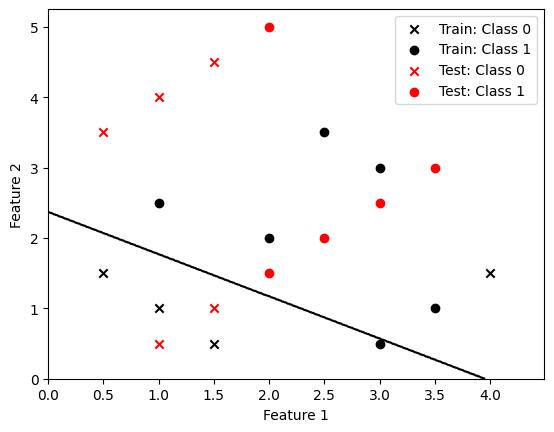

In [23]:
# prompt: 上のプログラムにデータセットの可視化を追加して。
# 提案コードをいくつか手で修正
# Class 1がpositive（正例）

import matplotlib.pyplot as plt

# データセットの可視化
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='black', marker='x', label='Train: Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='black', marker='o', label='Train: Class 1')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='red', marker='x', label='Test: Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='red', marker='o', label='Test: Class 1')

# 決定境界の描画
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='black')

# 凡例とラベルの追加
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# グラフの表示
plt.show()


以下は、参考までにプロンプトに対する1つ目の生成プログラム（ロジスティック回帰に対する精度評価）

In [25]:
# prompt: ロジスティック回帰で２クラスを分類するプログラムを書いて。10データの訓練セットと、10データのテストセットを作って。テストセットで精度評価をして。混同行列を書いて、正解率、精度、再現率、F値で評価して。

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 訓練データ
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1], [4, 0], [4, 1]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# テストデータ
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1], [4, 0], [4, 1]])
y_test = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

# モデルの学習
model = LogisticRegression()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 混同行列
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 正解率
accuracy = accuracy_score(y_test, y_pred)
print("正解率:", accuracy)

# 精度
precision = precision_score(y_test, y_pred)
print("精度:", precision)

# 再現率
recall = recall_score(y_test, y_pred)
print("再現率:", recall)

# F値
f1 = f1_score(y_test, y_pred)
print("F値:", f1)


[[2 3]
 [2 3]]
正解率: 0.5
精度: 0.5
再現率: 0.6
F値: 0.5454545454545454


以下は参考までに、修正前の提案プログラム（可視化）

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

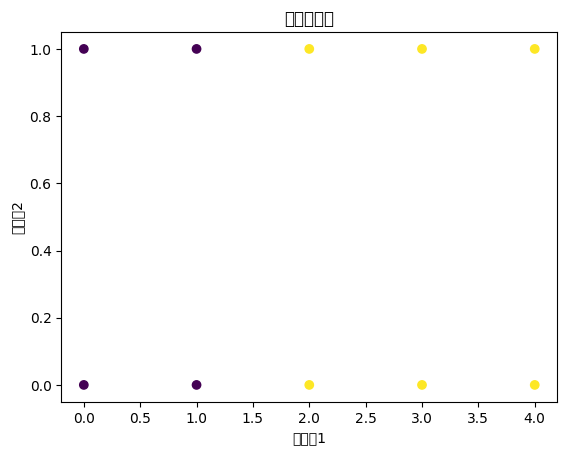

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


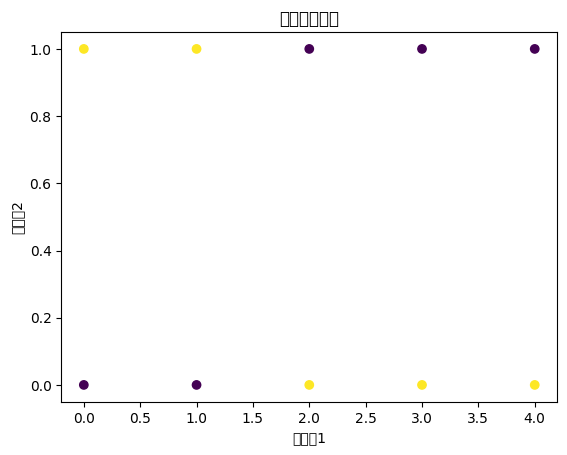

In [26]:
# prompt: 上のプログラムにデータセットの可視化を追加して。

import matplotlib.pyplot as plt

# 散布図を作成
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel("特徴量1")
plt.ylabel("特徴量2")
plt.title("訓練データ")
plt.show()

# 散布図を作成
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel("特徴量1")
plt.ylabel("特徴量2")
plt.title("テストデータ")
plt.show()

